# Stationary GMRF simulation with Discrete Fourier Transformation

In [9]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
sys.path.append('..')
#sys.path.append('../../spystats')
import django
django.setup()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

from external_plugins.spystats.spystats import tools as sptools
import scipy

# For benchmarking we will perfom a GF simulation.
Based on non-conditional simulation.


In [10]:
vm = sptools.ExponentialVariogram(sill=0.3,range_a=0.4)

In [388]:
%time xx,yy,z = sptools.simulatedGaussianFieldAsPcolorMesh(vm)

INFO:external_plugins.spystats.spystats.tools:Calculating Sigma (CovMat)


CPU times: user 19.8 s, sys: 696 ms, total: 20.4 s
Wall time: 6.71 s


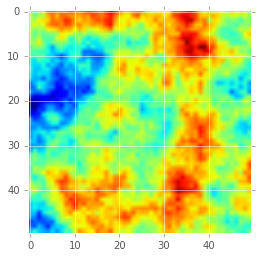

In [389]:
plt.imshow(z)

In [13]:
x = xx[1,:]
y = yy[:,1]

### Simulation of a temporal GMRF with DFT

In [372]:
import scipy.fftpack as fft
c_delta = lambda d : np.hstack(((2 + d),-1,np.zeros(128 - 3),-1))
c_base = c_delta(0.1)
c_base

array([ 2.1, -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ])

1.5617376188860608

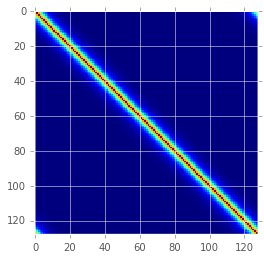

In [373]:
C = scipy.linalg.circulant(c_base)
n = C.shape[1]
C_inv = np.linalg.inv(C)
plt.imshow(C_inv, interpolation = 'None')
C_inv.max()

In [374]:

plop = fft.ifft(fft.fft(c_base) ** -1)
#plop = fft.rifft(fft.rfft(c_base) ** -1) / n
plop.real.max()


1.5617376188860603

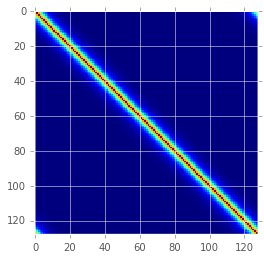

In [321]:
C_inv2 = scipy.linalg.circulant(plop.real)
plt.imshow(C_inv2, interpolation = 'None')

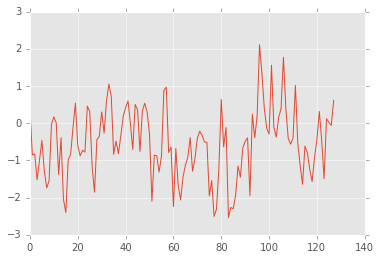

In [375]:
C_chol = np.linalg.cholesky(C_inv)
z = np.random.normal(0, 1, [n])
mmm = np.matmul(C_chol, z)
plt.plot(mmm);

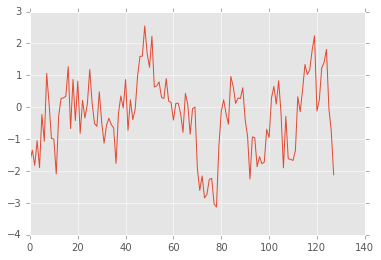

In [378]:
lambda_vec = fft.fft(c_base)
Lambda_aux = np.power(lambda_vec, -0.5)
z_re = np.random.normal(0, 1, [n])
z_im = np.random.normal(0, 1, [n])
z = z_re + 1j * z_im
# z = np.random.normal(0, 1, [n])
x = fft.fft(Lambda_aux.real * z).real / np.sqrt(n)
plt.plot(x);



### Now let's build the circulant matrix for the tourus

Oke, for the moment I´ll follow the example in GMRF book.
i.e. a Torus (stationary of 128x128)

In [396]:
#c_delta = lambda d : np.hstack(((4 + d),-1,np.zeros(128 - 3),-1))
#c_delta = lambda d : np.hstack(((0),-1,np.zeros(128 - 3),-1))
n = 64
N = 64
delta = 0.1
c_base = np.zeros([n, N])
c_base[0, 0] = 4 + delta
c_base[0, 1] = -1
c_base[0, 2] = -1

c_base[1, 0] = -1
c_base[2, 0] = -1

c_base[0, N-1] = -1
c_base[0, N-2] = -1

c_base[N-1, 0] = -1
c_base[N-2, 0] = -1

c_base

array([[ 4.1, -1. , -1. , ...,  0. , -1. , -1. ],
       [-1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 163 ms


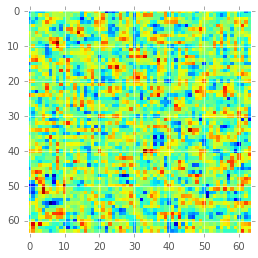

In [397]:
%%time 
lambda_mat = fft.fft2(c_base)
z_re = np.random.normal(0, 1, [n, N])
z_im = np.random.normal(0, 1, [n, N])
z = z_re + 1j * z_im
x = fft.fft2((lambda_mat ** -0.5) * z).real / np.sqrt(n *N)
plt.imshow(x, interpolation = 'None')

CPU times: user 152 ms, sys: 16 ms, total: 168 ms
Wall time: 164 ms


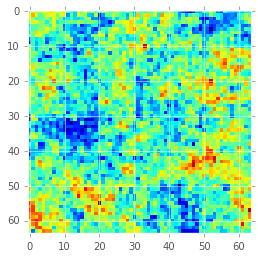

In [423]:
%%time

n = 64
N = 64
delta = 0.0001
c_base = np.zeros([n, N])
c_base[0, 0] = 4 + delta
c_base[0, 1] = -1
#c_base[0, 2] = -1

c_base[1, 0] = -1
#c_base[2, 0] = -1

c_base[0, N-1] = -1
#c_base[0, N-2] = -1

c_base[N-1, 0] = -1
#c_base[N-2, 0] = -1

 
lambda_mat = fft.fft2(c_base)
z_re = np.random.normal(0, 1, [n, N])
z_im = np.random.normal(0, 1, [n, N])
z = z_re + 1j * z_im
x = fft.fft2((lambda_mat ** -0.5) * z).real / np.sqrt(n *N)
plt.imshow(x, interpolation = 'none')

## Algorithm to simulate GMRF with block-circulant

In [69]:
## Simulate random noise (Normal distributed)
zr = scipy.stats.norm.rvs(size=(C.size,2),loc=0,scale=1)
zr.dtype=np.complex_
#plt.hist(zr.real)


In [70]:
from scipy.fftpack import ifft2, fft2

In [71]:
Lm = scipy.sqrt(C.shape[0]*C.shape[0]) * fft2(C)

In [72]:
Lm.shape

(10000, 10000)

In [73]:
zr.shape

(100000000, 1)

In [74]:
Lm.size

100000000

In [75]:
%time v = fft2(scipy.sqrt(Lm) * zr.reshape(Lm.shape))

CPU times: user 15.1 s, sys: 2.74 s, total: 17.9 s
Wall time: 17.9 s


In [76]:
x = v.real

In [77]:
x.shape

(10000, 10000)

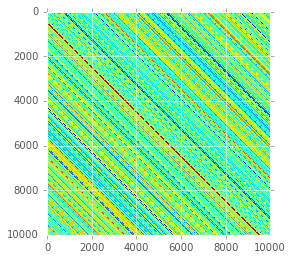

In [78]:
plt.imshow(x,interpolation='None')

In [79]:
cc = scipy.linalg.inv(C)

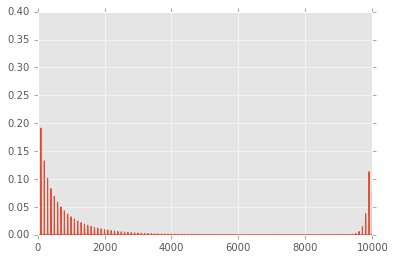

In [84]:
plt.plot(cc[:,0])

In [85]:
n = x.shape[0]
mm = scipy.stats.multivariate_normal(np.zeros(n),cc)

In [86]:
mmm = mm.rvs()

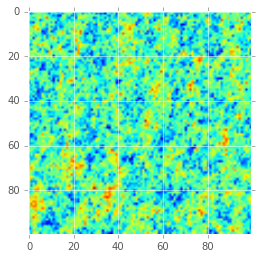

In [87]:
plt.imshow(mmm.reshape(100,100))

In [64]:
scipy.stats.multivariate_normal?

Signature:       scipy.stats.multivariate_normal(self, mean=None, cov=1, allow_singular=False, seed=None)
Call signature:  scipy.stats.multivariate_normal(mean=None, cov=1, allow_singular=False, seed=None)
Type:            multivariate_normal_gen
String form:     <scipy.stats._multivariate.multivariate_normal_gen object at 0x7f5f5d6b2a90>
File:            /opt/conda/envs/biospytial/lib/python2.7/site-packages/scipy/stats/_multivariate.py
Docstring:      
A multivariate normal random variable.

The `mean` keyword specifies the mean. The `cov` keyword specifies the
covariance matrix.

Methods
-------
``pdf(x, mean=None, cov=1, allow_singular=False)``
    Probability density function.
``logpdf(x, mean=None, cov=1, allow_singular=False)``
    Log of the probability density function.
``cdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5, releps=1e-5)``
    Cumulative distribution function.
``logcdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abs

In [510]:
nn = mm.rvs()

256

## Example to perform a FFT in two dimensions

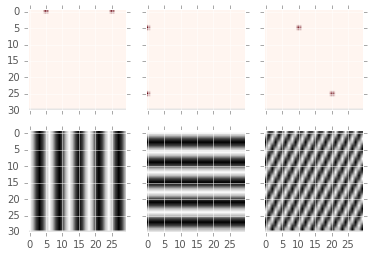

In [8]:
from scipy.fftpack import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()